In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# Set font size and style in matplotlib
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

In [10]:
data = pd.read_excel('./data/triglyceride_biosynthesis_and_degradation_expression.xlsx')
data_columns = [c for c in data.columns if 'FPKM' in c]

# Normalize data columns by mean 
data[data_columns] = data[data_columns].div(data[data_columns].mean(axis=1), axis=0)

id_columns = [c for c in data.columns if not c in data_columns]
data = data.melt(id_vars=id_columns)


# Clean up variable columns 
data[['adipose','temp','rep','unit']] = data['variable'].str.split(' ', expand=True)

In [11]:
data.gene_name.unique()

array(['Gk', 'Gpam', 'Agpat1', 'Agpat2', 'Agpat3', 'Agpat4', 'Mogat1',
       'Mogat2', 'Dgat1', 'Dgat2', 'Pnpla2', 'Lipe', 'Mgll'], dtype=object)

In [12]:
data.adipose.unique()

array(['iWAT', 'eWAT'], dtype=object)

In [ ]:
# Pairs to test for statistical significance
pairs = [ 
        (('Agpat1','iWAT') , ('Agpat1','eWAT')),      
        (('Agpat2','iWAT') , ('Agpat2','eWAT')),      
        (('Agpat3','iWAT') , ('Agpat3','eWAT')),     
        (('Dgat1','iWAT') , ('Dgat1','eWAT')),     
        (('Dgat2','iWAT') , ('Dgat2','eWAT')),     
        (('Pnpla2','iWAT') , ('Pnpla2','eWAT')),     
        (('Lipe','iWAT') , ('Lipe','eWAT')),     
         ]

  

Text(0.5, 0, '')

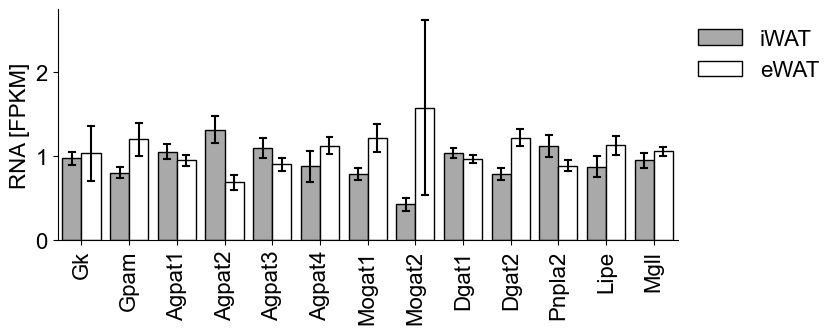

In [15]:
# Plot expression 
f, ax = plt.subplots(1,1, figsize=(8,3))

colors = ['darkgrey', 'white', ]

sns.barplot(data, y='value', x='gene_name', hue='adipose', palette=colors,edgecolor='black',
            errorbar='sd',capsize=0.25,   err_kws={'color': 'black','linewidth': 1.5},
            )

plt.xticks(rotation=90)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# annotator = Annotator(ax=ax, pairs=pairs, data=data,
#                      x='gene_name', y='value', 
#                       hue='adipose' )
# annotator.configure(test='t-test_welch', text_format='star', loc='inside')
# annotator.apply_and_annotate()

plt.ylabel('RNA [FPKM]')
plt.xlabel('')

